In [216]:
   
    from pathlib import Path
    import pandas as pd
    import tensorflow as tf
    import torch
    import torchaudio
    import numpy as np
    import matplotlib.pyplot as plt
    import random
    from torchaudio import transforms
    from torchvision import models
    alexnet = models.alexnet(pretrained = True)
    import librosa
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    from sklearn.metrics import multilabel_confusion_matrix
    import seaborn as sns
    #from sklearn.metrics import plot_confusion_matrix
    from tensorflow.keras import datasets, layers, models
    from keras import backend as K
    import math
import keras
    input_dir = Path.cwd()
    files = list(input_dir.rglob("*.ogg*")) 
    # store a list of all audio paths
    testingPaths = list(input_dir.rglob("*.wav*"))
    #print(files[0])\n",
    folders = list(input_dir.glob("* - *"))
    #print(folders)\n",
    #RECHANNEL ADDITIONAL DATA, ADD THE FUNCTION]
    # 7, 65,21
    # test the esc-50 dataset with 15 clases per recording

C:\Users\anand\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\anand\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [217]:
print(folders)

[]


In [218]:
print(len(files))

2000


print(len(files))

In [219]:
label = 0
counter1 = -1
finalLabels = []
for i in range(len(files)):
    counter1 = counter1 + 1
    if counter1 % 40 == 0 and counter1 != 0:
        label = label + 1
    print(i, counter1, label)
    finalLabels.append(label)
    #"    "

0 0 0
1 1 0
2 2 0
3 3 0
4 4 0
5 5 0
6 6 0
7 7 0
8 8 0
9 9 0
10 10 0
11 11 0
12 12 0
13 13 0
14 14 0
15 15 0
16 16 0
17 17 0
18 18 0
19 19 0
20 20 0
21 21 0
22 22 0
23 23 0
24 24 0
25 25 0
26 26 0
27 27 0
28 28 0
29 29 0
30 30 0
31 31 0
32 32 0
33 33 0
34 34 0
35 35 0
36 36 0
37 37 0
38 38 0
39 39 0
40 40 1
41 41 1
42 42 1
43 43 1
44 44 1
45 45 1
46 46 1
47 47 1
48 48 1
49 49 1
50 50 1
51 51 1
52 52 1
53 53 1
54 54 1
55 55 1
56 56 1
57 57 1
58 58 1
59 59 1
60 60 1
61 61 1
62 62 1
63 63 1
64 64 1
65 65 1
66 66 1
67 67 1
68 68 1
69 69 1
70 70 1
71 71 1
72 72 1
73 73 1
74 74 1
75 75 1
76 76 1
77 77 1
78 78 1
79 79 1
80 80 2
81 81 2
82 82 2
83 83 2
84 84 2
85 85 2
86 86 2
87 87 2
88 88 2
89 89 2
90 90 2
91 91 2
92 92 2
93 93 2
94 94 2
95 95 2
96 96 2
97 97 2
98 98 2
99 99 2
100 100 2
101 101 2
102 102 2
103 103 2
104 104 2
105 105 2
106 106 2
107 107 2
108 108 2
109 109 2
110 110 2
111 111 2
112 112 2
113 113 2
114 114 2
115 115 2
116 116 2
117 117 2
118 118 2
119 119 2
120 120 3
121 121 3


In [220]:
print(len(finalLabels))

2000


In [221]:
updatedFiles = []
num = 0
for i in range(50):
   for j in range(10):
      updatedFiles.append(files[j + num])
   num  = num + 40

In [222]:
updatedTestingFiles = []
num = 30
for i in range(50):
  for j in range(5):
    updatedTestingFiles.append(files[j + num])
  num = num + 40
    

In [223]:
updatedTrainingLabels = []
num = 0
for i in range(50):
      for j in range(10):
           updatedTrainingLabels.append(finalLabels[j + num])
      num  = num + 40

In [224]:
updatedTestingLabels = []
num = 30
for i in range(50):
           for j in range(5):
                updatedTestingLabels.append(finalLabels[j + num])
           num = num + 40

In [225]:
print(updatedTestingLabels[6])
print(updatedTestingFiles[20])
print(len(updatedTestingFiles))
print(len(updatedTestingLabels))
print(len(updatedFiles))

1
c:\AiEnvironment\FrogProject\FrogProject\ESC-50\ESC-50\105 - Frog\4-99644-C.ogg
250
250
500


In [226]:
class_names = ['Dog', 'Rooster', 'Pig', 'Cow', 'Forg', 'Cat', 'Hen', 'Insects', 'Sheep', 'Crow', 'Rain', 'Sea Waves', 'Crackling Fire', 'Crickets', 'Chirping Birds', 'Water drops', 'Wind', 'Pouring Water', 'Toilet flush', 'Thunderstorm', 'Crying Baby', 'Sneezing', 'Clapping', 'Breathing', 'Coughing', 'Footsteps', 'Laughing', 'Brushing Teeth', 'Snoring', 'Drinking, Sipping', 'Door Knock', 'Mouse Click', 'Keyboard typing', 'Door- wood creaks', 'Car Opening', 'Washing Machine', 'Vacuum Cleaner', 'Clock Alarm', 'Clock Tick', 'Glass Breaking', 'Helicopter', 'Chainsaw', 'Siren', 'Car Horn', 'Engine', 'Train', 'Church Bells', 'Airplane', 'Fireworks', 'Hand saw' ]

In [227]:
#  mixedRecordings = []
#   counter = 0\
#     for testingPath in testingPaths
     
#             if int(str(testingPath)[55:56]) == 7 or int(str(testingPath)[55:56]) == 6 or int(str(testingPath)[55:56]) == 2:
#               if(int(str(testingPath)[55:56]) == 2 )
    
#                 if(str(testingPath)[73:74] == \"G\")
    
#                      mixedRecordings.append(testingPath)
#             else
    
#                 mixedRecordings.append(testingPath)
    
#     mixedRecordings
#     for recording in mixedRecordings
#         for path in testingPaths
#             if recording == path
#                 testingPaths.remove(path)
#     print(len(mixedRecordings))
#     #21, 65, 7 
#     0,15,30, 9

In [228]:
  # print(len(mixedRecordings))
mixedRecordings = updatedTestingFiles
    # print(testingPaths)
   # print(len(mixedRecordings))

In [229]:

    class_names = []

In [230]:
    # PATH_IDENTIFIER = 57
    # data = [[]]
    # for file, folder in zip(files, folders):
    #     data.append([file, folder])
    # data.pop(0)
    # updatedData = data
    # for i in range(len(updatedData)):
    #     updatedData[i][1] = str(data[i][1])[55:]
    # dftrain = pd.DataFrame(updatedData, columns = ['FilePath', 'Class ID'])
    # dftrain
    # #arranged the meta data with files paths corresponding to classIds\n",
    # print(str(testingPaths[0])[:57])
    # print(str(files[0])[:60])
    # print(testingPaths.index(testingPaths[1]))

In [231]:
  # Class_names = []   
  #  morePaths = dftrain['FilePath']
  #   classIds = dftrain[\"Class ID\"]
  #   dict = {}
  #   for i in range(71)
  #       dict[int(classIds[i])] = str(morePaths[i])[57:-4]
  #   myKeys = list(dict.keys())
  #   myKeys.sort()
  #   sorted_dict = {i: dict[i] for i in myKeys}
  #   sorted_dict
  #   class_names = dict.values()
  #   class_names

In [232]:
 # testingLabels = [] #extends the labels and testingPaths to the data array and label array
    # paths1 = dftrain['FilePath']
    # paths1 = list(paths1)
    
    # for path in testingPaths
    #     for nextPath in paths1
    
    #         #print(str(path)[:PATH_IDENTIFIER]  str(nextPath)[:PATH_IDENTIFIER])
    #         if str(path)[:PATH_IDENTIFIER] == str(nextPath)[:PATH_IDENTIFIER]
    
    #             testingLabels.append(int(dftrain.iloc[paths1.index(nextPath)][1]))
    #             break
    # print(dftrain)
    # # print(testingLabels)

In [233]:
#  class_names = []
#     for i in range(71):
#         class_names.append(i)

In [234]:
# NUM_CLASSES = -1
    # classes = dftrain[\"Class ID\"]
    
    # for aClass in classes
    #     if int(aClass) > NUM_CLASSES
    #         NUM_CLASSES = int(aClass)
    # NUM_CLASSES = NUM_CLASSES + 1
    # print(NUM_CLASSES)

In [235]:
print(testingPaths)

[]


In [236]:
print(len(updatedFiles))

500


In [237]:
paths = updatedFiles
paths = list(paths)
#paths.extend(testingPaths)
INITIAL_SAMPLE_NUM = len(paths)
paths.extend(mixedRecordings)
data1 = []
for path in paths:
    data1.append(torchaudio.load(path))
    #waveform, sample_rate = torchaudio.load(dftrain['FilePath'][0])
   #len(data1[0])\n",
    

In [238]:
print(len(data1))

750


In [239]:
# def plot_waveform(waveform, sample_rate):\n",
#    # waveform = waveform.numpy()\n",

#     num_channels, num_frames = waveform.shape\n",
#     time_axis = torch.arange(0, num_frames) / sample_rate\n",
#     figure, axes = plt.subplots(num_channels, 1)\n",
#     if num_channels == 1:\n",
#         axes = [axes]\n",
    #     for c in range(num_channels):
    #         axes[c].plot(time_axis, waveform[c], linewidth=1)
    #         axes[c].grid(True)
    #         if num_channels > 1:
    #             axes[c].set_ylabel(f"Channel {c+1}")
    #     figure.suptitle("waveform")
    #     plt.show(block=False)"

In [240]:

def re_channel(aud):
    sig, sr = aud 
    if(sig.shape[0] == 1):
        print("hi")
        resig = torch.cat([sig, sig])
        return (resig, sr)
    else:
        return (sig, sr)

In [241]:
print(len(data1))

750


In [242]:
for i in range(0, len(data1)):
       data1[i]  = re_channel(data1[i])
    

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
h

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
h

In [243]:
 def resample(aud, newsr):
      sig, sr = aud
      if (sr == newsr):
        # Nothing to do\n",
        return aud
  
      num_channels = sig.shape[0]
      # Resample first channel
      resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
      if (num_channels > 1):
          # Resample the second channel and merge both channels\n",
          retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
          resig = torch.cat([resig, retwo])
    
          return (resig, newsr)

In [244]:
for i in range(0, len(data1)):
        data1[i]= resample(data1[i], 48000)
    
for i in range(0, len(data1)):
        print(data1[i][0].shape)
        print(data1[i][1])

torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240576])
48000
torch.Size([2, 240832])
48000
torch.Size([2, 241093])
48000
torch.Size([2, 240704])
48000
torch.Size([2, 240954])
48000
torch.Size

In [245]:
print(data1[0][0].shape)
# does padding 0s affect output
maximum = 0
for data in data1:
        maximum =  max(data[0].shape[1], maximum)
maximum

torch.Size([2, 240048])


347534

In [246]:
 def pad_trunc(aud, max_ms):
      sig, sr = aud
      num_rows, sig_len = sig.shape
      max_len = sr//1000 * max_ms
    
      if (sig_len > max_len):
          # Truncate the signal to the given length\n",
          print("hill")
          sig = sig[:,:max_len]
    
      elif (sig_len < max_len):
          print("hi")
          # Length of padding to add at the beginning and end of the signal\n",
          #pad_begin_len = random.randint(0, max_len - sig_len)\n",
          pad_end_len = max_len - sig_len
          # Pad with 0s\n",
         # pad_begin = torch.zeros((num_rows, pad_begin_len))\n",
          pad_end = torch.zeros((num_rows, pad_end_len))
    
          sig = torch.cat(( sig, pad_end), 1)
    
      return (sig, sr)

In [247]:
 
    for i in range(0, len(data1)):
        print(data1[i][0].shape)
        print(data1[i][1])

torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240048])
48000
torch.Size([2, 240576])
48000
torch.Size([2, 240832])
48000
torch.Size([2, 241093])
48000
torch.Size([2, 240704])
48000
torch.Size([2, 240954])
48000
torch.Size

In [248]:
 for i in range(0, len(data1)):
        data1[i]= pad_trunc(data1[i], 5000)# amount of time each clip is
        # ELIF STATEMENT IS BROKEN FOR SOME REASON
        # why is it broken???
 var = 1999935
   

hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hi
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hi
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hi
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
h

In [249]:

for i in range(0, len(data1)):
   print(data1[i][0].shape)
   print(data1[i][1])

torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size

In [250]:
print(data1[15][0][0])

tensor([0.0005, 0.0008, 0.0009,  ..., 0.0000, 0.0000, 0.0000])


In [251]:
print(type(data1[0][0]))

<class 'torch.Tensor'>


In [252]:
# # remove talking from recordings\n",

    # to_remove = 48000 * 8
    # length = 48000 * 30
    # data3 = []
    # to_removeOther = 48000 * 22
    # #data3 = np.array(data3)
    # for i in range(0, len(data1)- len(mixedRecordings)):# - len(testingPaths) 
    #     samples, rates = data1[i]
    #     lst1= samples[0].numpy()
    #     lst2= samples[1].numpy()
    #     lst1 = lst1[to_remove:]
    #     lst2 = lst2[to_remove:]
    #     lst = [lst1, lst2]
    #     lst = np.array(lst) #makes it much faster
    #     lst = torch.tensor(lst)
    #     data3.append((lst, 48000))
    # for i in range(len(data1) - len(mixedRecordings), len(data1)):# - len(testingPaths) 
    #     samples, rates = data1[i]
    #     lst1= samples[0].numpy()
    #     lst2= samples[1].numpy()
    #     lst1 = lst1[: to_removeOther]
    #     lst2 = lst2[: to_removeOther]
    #     lst = [lst1, lst2]
    #     lst = np.array(lst) #makes it much faster
    #     lst = torch.tensor(lst)
    #     data3.append((lst, 48000))
    # # remove back 8 seconds from non-mandookavani recordings
    # for i in range(0, len(data1)- len(mixedRecordings)):# - len(testingPaths) 
    #     print(data3[i][0].shape)
    #     print(data3[i][1])
    # len(data3)"

In [253]:
data3 = data1

In [254]:
print(len(data1))

750


In [255]:
print(len(data3))
mixedData = data3[len(data3) - len(mixedRecordings):]
data3 = data3[:len(data3) - len(mixedRecordings)]

750


In [256]:
len(data3)

500

In [257]:
print(type(data3))

<class 'list'>


In [258]:
"# time shift\n",
def time_shift(aud, shift_limit):
    sig,sr = aud
    sig_len = aud[1]
    print(type(sig))
    shift_amt = int(random.random() * shift_limit * sig_len)
    print(type(sig))
    #sig.roll(shift_amt)
    return (sig.roll(shift_amt), sr)
print(len(data3))
len(mixedData)

500


250

In [259]:
print(data1[0][0][1].shape)

torch.Size([240000])


In [260]:
 def noise_injection(data,noise_levels=(0, 1)):
            sound, sr = data
           # tp = sound[0][0]
            #print(type(tp))
           # print(type(sound[0][0]))
            noise_level = np.random.uniform(*noise_levels)
            noise = np.random.randn(len(sound[0])) # add [0] after sound
            sound = np.array(sound)
    
            augmented_sound = sound + noise_level * noise
            #print(augmented_sound == sound)
            # Cast back to same data type\n",

            augmented_sound = augmented_sound.astype('float32')
            #print(type(augmented_sound[0][0]))
            #print(type(sound[0][0]))
           # tp =type(sound[0][0])
            augmented_sound = torch.from_numpy(augmented_sound)
           # print(type(augmented_sound))
            return (augmented_sound, sr)


In [261]:
def perform_noise_injections(times, data, length):
    for i in range(times):
            for i in range(length):
                data.append(noise_injection(data[i]))
          
    return data

In [262]:
def perform_timeShifts(times, data, length):
    for i in range(times):
        for i in range(length):
            data.append(time_shift(data[i], .5))
        
    return data

In [263]:
TIMES = 100
data3 = perform_timeShifts(1, data3, 500)
#mixedData = perform_timeShifts(TIMES * 2, mixedData)
    


<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'tor

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'tor

In [264]:
 data3 = perform_noise_injections(1, data3, 500)

In [265]:
len(data3)

1500

In [266]:
print(len(mixedData))

250


In [267]:
print(type(mixedData))

<class 'list'>


In [268]:
#     fig, ax = plt.subplots()
#  #print(data1[71][0].shape)\n",
 
#     sample_data = librosa.load(paths[200
#                                      ])
#     print(sample_data[0].shape)
#     sample_data = time_shift(sample_data, .5)
    
#     #print(sample_data[].shape)
#     spect = librosa.feature.melspectrogram(y=np.array(sample_data[0]), sr=sample_data[1], n_mels=128,
#                                         fmax=10000)
#     print(spect.shape)
#     S_dB = librosa.power_to_db(spect, ref=np.max)
#     print(S_dB.shape)
#     img = librosa.display.specshow(S_dB, x_axis='time',
#                              y_axis='mel', sr=48000,
#                              fmax=8000, ax=ax)
#     fig.colorbar(img, ax=ax, format='%+2.0f dB')
#     ax.set(title='Mel-frequency spectrogram')

In [269]:
 # #print(data3[4000][0][0][30000])
    # print(type(mixedData[0][0][0]))
    # print()
    # for i in range(15):
        
    #     new_data = mixedData[i]
    #     pads = torch.zeros(new_data[1] * 22 - new_data[1] * 6)
    #     lastPadding = torch.zeros(new_data[1] * 18)
    #     #print(type(data))
    #     #print(type(new_data[0][0].numpy()))
    #   #  new_data[0][0] = new_data[0][0].numpy()
    #     #new_data[0][1] = np.array(new_data[0][1])
    #     #print(type(torch.from_numpy(new_data[0][0].numpy()[:new_data[1] * 6])))
    #     new_data[0][0] = torch.cat((torch.from_numpy(new_data[0][0].numpy()[:new_data[1] * 6]), pads))
    #     new_data[0][1] = torch.cat((torch.from_numpy(new_data[0][1].numpy()[:new_data[1] * 6]), pads))
    #    # print(mixedData.shape, new_data.shape)
    #     print(\"1\")
    #     mixedData.append(new_data)
    #     print(\"2\")
    #     new_data[0][0] = torch.cat((torch.from_numpy(new_data[0][0].numpy()[new_data[1] * 6:new_data[1] * 12]), pads))
    #     new_data[0][1] = torch.cat((torch.from_numpy(new_data[0][1].numpy()[new_data[1] * 6:new_data[1] * 12]), pads))
    #     mixedData.append(new_data)
    #     new_data[0][0] = torch.cat((torch.from_numpy(new_data[0][0].numpy()[new_data[1] * 12: new_data[1] * 18]), pads))
    #     new_data[0][1] = torch.cat((torch.from_numpy(new_data[0][1].numpy()[new_data[1] * 12: new_data[1] * 18]), pads))
    #     #print(data[0].shape)
    #     mixedData.append(new_data)
    #     new_data[0][0] = torch.cat((torch.from_numpy(new_data[0][0].numpy()[new_data[1] * 18:]), lastPadding))
    #     new_data[0][1] = torch.cat((torch.from_numpy(new_data[0][1].numpy()[new_data[1] * 18:]), lastPadding))
    #     mixedData.append(new_data)
    #     print(i) 

In [270]:
print(len(mixedData))

250


In [271]:
 #mixedData = perform_timeShifts(2, mixedData, 500)

In [272]:
 # mixedData = perform_noise_injections(2, mixedData, 500)

In [273]:
print(len(mixedData))

250


In [274]:
 print(len(mixedData))

250


In [275]:
 # testing_labels = [21, 65, 7]
    # for i in range(TIMES * 4):
    #     testing_labels.extend([21,65,7])
    # # # creating testing labels
    # #MIXED RECORDINGS

In [276]:
 # testingLabels = []
    # testingLabels.extend([0, 11, 15, 2, 2, 2, 25, 25, 30, 38, 39, 4, 41, 58, 9])
   # # for i in range(15):
    # #     testingLabels.extend([testingLabels[i],testingLabels[i], testingLabels[i], testingLabels[i] ])
    # for i in range(TIMES):
    #     testingLabels.extend([0, 11, 15, 2, 2, 2, 25, 25, 30, 38, 39, 4, 41, 58, 9])

In [277]:
  #print(len(testingLabels))

In [278]:
print(len(updatedFiles))

500


In [279]:
instantLabel = updatedTrainingLabels
labels = []
labels.extend(updatedTrainingLabels)
for i in range(2):
         labels.extend(instantLabel)
        #print(len(labels))
    
       # labels.extend(testingLabels)
for i in range(len(labels)):
            labels[i] = int(labels[i])
    
    # for i in range(0, 4)
    #       print(labels[74])
    #       #0, 30, 51, 9
    

In [280]:
print(len(labels))

1500


In [281]:
 
    labels1 = []
    labels1.extend(updatedTestingLabels)
    # for i in range(4):
    # labels1.extend(updatedTestingLabels)

In [282]:
print(updatedTrainingLabels[30])

3


In [283]:
 # mel spectrogram turning its hyperparameters
def spectro_gram(aud, n_mels=64, n_fft=1024, hop_len=256):
        sig,sr = aud
        top_db = 80
    
        # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
        spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

       # Convert to decibels
        spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
        return (spec)

In [284]:
print(len(data3))

1500


In [285]:
    melData = []
    tf_data = []
    data3.extend(mixedData)
    print(len(data3))
    
    for data in data3: 
        print(type(data[0]))
    
        specto = spectro_gram(data)
    
        melData.append(specto)
    
        # num_channels, num_mels, time
    print("hi")
    for data in melData:
    
        #np_array = data.numpy()# DO I HAVE TO DO THIS LINE?
        np_array = np.array(data)
        tf_data.append(np_array)
    melData = np.array(melData)
    

1750
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class

C:\Users\anand\AppData\Local\Temp\ipykernel_14852\3593344793.py:20: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  melData = np.array(melData)
C:\Users\anand\AppData\Local\Temp\ipykernel_14852\3593344793.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  melData = np.array(melData)


In [286]:

     # Augment the Spectrogram by masking out some sections of it in both the frequency
      # dimension (ie. horizontal bars) and the time dimension (vertical bars) to prevent
      # overfitting and to help the model generalise better. The masked sections are
      # replaced with the mean value.
      # ----------------------------
   
def spectro_augment(spec, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1):
        _, n_mels, n_steps = spec.shape #_,
        mask_value = spec.mean()
        aug_spec = spec
   
        freq_mask_param = max_mask_pct * n_mels
        for _ in range(n_freq_masks):
          aug_spec = transforms.FrequencyMasking(freq_mask_param)(aug_spec, mask_value)
    
        time_mask_param = max_mask_pct * n_steps
        for _ in range(n_time_masks):
          aug_spec = transforms.TimeMasking(time_mask_param)(aug_spec, mask_value)
        return aug_spec

In [287]:
   print(type(spectro_augment(torch.from_numpy(tf_data[0])).numpy()))

<class 'numpy.ndarray'>


In [288]:
mixedData = tf_data[len(tf_data) - len(mixedData):]
tf_data = tf_data[:len(tf_data) - len(mixedData)]

In [289]:
print(len(tf_data))

1500


In [290]:
    initialLen = len(tf_data)
    for i in range(initialLen): 
  
        tf_data.append(spectro_augment(torch.from_numpy(tf_data[i])).numpy())
     

In [291]:
labels2 = labels
labels.extend(labels2)
  #labels.extend(testingLabels)

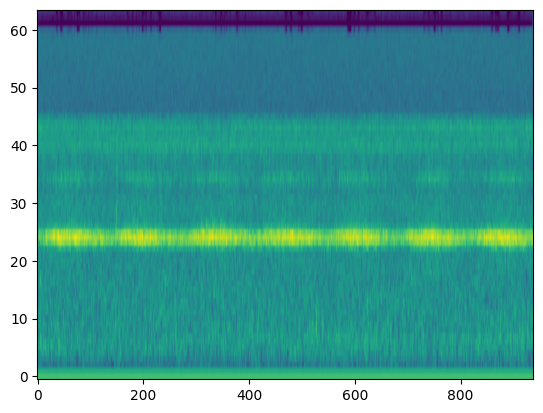

(2, 64, 938)

In [292]:
def tensor_to_img(spectrogram): 
    plt.imshow(spectrogram[0],aspect='auto', origin='lower')
    plt.show();
    display(spectrogram.shape)
tensor_to_img(tf_data[138])

In [293]:
def time_mask(spec, time=40, num_masks=1):
    test = spec
    length = test.shape[2]
    for i in range(0, num_masks):
        t = random.randrange(0, time)
        zero = random.randrange(0, length - t)
        if (zero == zero + t): return cloned
        mask_end = random.randrange(zero, zero + t)
        test[0][:,zero:mask_end] = test.mean()
    return test

In [294]:
def freq_mask(spec, F=250, num_masks=1):
    test = spec
    num_mel_channels = test.shape[1]
    for i in range(0, num_masks):        
        freq = random.randrange(0, F)
        zero = random.randrange(0, num_mel_channels - freq)
        # avoids randrange error if values are equal and range is empty
        if (zero == zero + freq): return test
        mask_end = random.randrange(zero, zero + freq) 
        test[0][zero:mask_end] = test.mean()
    return test

In [295]:
#     fig, ax = plt.subplots()
#  #print(data1[71][0].shape)\n",
 
#     sample_data = librosa.load(paths[200
#                                      ])
#     print(sample_data[0].shape)

#     sample_data = noise_injection(sample_data)
#     #print(sample_data[].shape)
#     spect = librosa.feature.melspectrogram(y=np.array(sample_data[0]), sr=sample_data[1], n_mels=128,
#                                         fmax=10000)
    
#     print(spect.shape)
#     S_dB = librosa.power_to_db(spect, ref=np.max)
#     print(S_dB.shape)
    
#     img = librosa.display.specshow(S_dB, x_axis='time',
#                              y_axis='mel', sr=48000,
#                              fmax=8000, ax=ax)
#     fig.colorbar(img, ax=ax, format='%+2.0f dB')
#     ax.set(title='Mel-frequency spectrogram')

In [296]:
    mixedData = list(mixedData)
    initialLen = len(mixedData)
    for i in range(initialLen): 
  
        mixedData.append(spectro_augment(torch.from_numpy(mixedData[i])).numpy())

In [297]:
labels2 = labels1
labels1.extend(labels2)


In [298]:
# def tensor_to_img(spectrogram): 
#     plt.imshow(spectrogram[0],aspect='auto', origin='lower')
#     plt.show();
#     display(spectrogram.shape)
# tensor_to_img(tf_data[600])

In [299]:
# print(tf_data[200][0][0][1], tf_data[700][0][0][1])

In [300]:
mixedData = np.array(mixedData)
print(len(labels1), len(mixedData))

500 500


In [301]:
for data in tf_data:
    print(data.shape)

(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)
(2, 64, 938)

In [302]:

tf_data = np.array(tf_data)

In [303]:
print(tf_data.shape)

(3000, 2, 64, 938)


In [304]:
print(len(tf_data))
print(.21
           * len(tf_data))

3000
630.0


In [305]:
 # labels = np.array(labels)
    #testingLabels = np.array(testingLabels)
    
    # training_data = tf_data[:len(data3) - len(mixedData)]
    # testing_data = tf_data[len(data3) - len(mixedData):]
    # training_labels = labels
    
    #mixedData = tf_data[len(tf_data) - len(mixedData):]
    #tf_data = tf_data[: len(tf_data) - len(mixedData)]
    # should i increase the amount of sample in testing set
print(len(tf_data))
print(len(labels))
breakdown = int(.79
               *len(tf_data))
training_data = tf_data
#testing_data = tf_data[breakdown:]
training_labels = labels
training_labels = np.array(training_labels)
# testing_labels = labels[breakdown: ]# numpy arrays with numpy integer
testing_data = mixedData
testing_labels = labels1

3000
3000


In [306]:

    # use a pretrained model  AlexNet, Mobilenet, Xception
    # research neural networks 

    print(type(training_data))
    testing_labels = np.array(testing_labels)

<class 'numpy.ndarray'>


In [307]:
print(len(testing_data))

500


In [308]:
print(testing_labels[9
                         ])

1


In [309]:
mixedData = np.array(mixedData)
    
    #testing_data = np.concatenate((testing_data, mixedData))
    #testing_labels = np.concatenate((testing_labels, testingLabels))

In [310]:
  testing_data = np.array(testing_data)
  print(type(testing_labels))

<class 'numpy.ndarray'>


In [311]:
print(type(testing_data))

<class 'numpy.ndarray'>


In [312]:
print(testing_labels[10])

2


In [313]:
  training_data = np.rollaxis(training_data,1,3)  
  training_data = np.rollaxis(training_data,3,2)  
  print(testing_data.shape)

(500, 2, 64, 938)


In [314]:
testing_data = np.rollaxis(testing_data,1,3)  
testing_data = np.rollaxis(testing_data,3,2)  
print(testing_data.shape)

(500, 64, 938, 2)


In [315]:
optimizer = keras.optimizers.Adam(lr=0.00001)

C:\Users\anand\AppData\Roaming\Python\Python311\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [316]:

    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=( 64, 938, 2) ))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((3,3)))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
   # model.add(layers.Conv2D(128, (3,3), activation='relu'))
    #model.add(layers.Conv2D(128, (1,1), activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
   # model.add(layers.Dropout(.1))
#dropout.  1    
    model.add(layers.Dense(50, activation = 'softmax'))

In [317]:
# tune parameters of model(learning rate)
# try different activation
model.summary()
print(len(training_labels))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 936, 32)       608       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 468, 32)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 466, 64)       18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 233, 64)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 231, 64)       36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 77, 64)       

In [318]:
# 20 epochs worked well -> more 92.9
    # 40 epoc -> 95.6 accuracy
    # 60 -> 98.3 accuracy

model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

history = model.fit(training_data, training_labels, epochs=40   , 
                    validation_data=(testing_data, testing_labels)  )
   
    # test 1 recording from test spceies
    # is mel spectrogram a case
    # try without augmentaiotn / small nn (40 % training accuracy 0-6% testing accuracy)
    # try with agmentaiton / small nn ( if jump is not big enough, mel spectrogarm not good neough ( small nn with 92% training accuracy, 66% testing accuracy), validiation accuracy failes to increase afrter accuracy of arround 70 percent training
    # try with augmentation / big nn (big nn with 93 % training accuracy, 66 accuracy)
    # svm model"

Epoch 1/40
94/94 [==============================] - 66s 698ms/step - loss: 3.9283 - accuracy: 0.0263 - val_loss: 3.6898 - val_accuracy: 0.0600
Epoch 2/40
94/94 [==============================] - 65s 694ms/step - loss: 3.5529 - accuracy: 0.0827 - val_loss: 3.3412 - val_accuracy: 0.1680
Epoch 3/40
94/94 [==============================] - 65s 695ms/step - loss: 2.9681 - accuracy: 0.2177 - val_loss: 3.5449 - val_accuracy: 0.1520
Epoch 4/40
94/94 [==============================] - 65s 694ms/step - loss: 2.3476 - accuracy: 0.3633 - val_loss: 3.5676 - val_accuracy: 0.2520
Epoch 5/40
94/94 [==============================] - 65s 692ms/step - loss: 1.9643 - accuracy: 0.4727 - val_loss: 4.7597 - val_accuracy: 0.2580
Epoch 6/40
94/94 [==============================] - 65s 692ms/step - loss: 1.6573 - accuracy: 0.5583 - val_loss: 5.5747 - val_accuracy: 0.2480
Epoch 7/40
94/94 [==============================] - 65s 694ms/step - loss: 1.5543 - accuracy: 0.5883 - val_loss: 6.3844 - val_accuracy: 0.2820

In [ ]:
  test_loss, test_acc = model.evaluate(testing_data,  testing_labels, verbose=2)
  print(test_acc)
    # how to display confidence scores of each input??? 

32/32 - 4s - loss: 7.9848 - accuracy: 0.3840 - 4s/epoch - 138ms/step
0.3840000033378601


In [ ]:
#testing_data = torch.from_numpy(testing_data)

TypeError: expected np.ndarray (got Tensor)

In [ ]:
testing_data = np.array(testing_data)

In [ ]:
print(testing_data.shape)

(500, 64, 938, 2)


OverflowError: math range error

In [ ]:
print(type(testing_data))

<class 'numpy.ndarray'>


In [ ]:
    prediction = model.predict(testing_data).round()
#print(testing_data.shape)
#print(prediction[11][1])
    updated_predictions = []
    maximum = -1
    for i in range(0, len(prediction)):
        print(prediction[i][testing_labels[i]] * 100,  "TestingLabel: " + str(testing_labels[i]))
        updated_predictions.append((prediction[i][testing_labels[i]] * 100,testing_labels[i]))
        #for j in range(0, len(prediction[i]))
           # if(prediction[i][j] > maximum)
               # maximum = prediction[i][j]
           # if prediction[i][j] < 0
               # prediction[i][j] = 0
           # elif prediction [i][j] < -32
             #  prediction[i][j] = 0
           # else
               # prediction[i][j] = sigmoid(prediction[i][j])
    
    #print(testing_labels[0])
    print(prediction[2])
    #print(maximum)
    #print(\"prediction shape:\", prediction.shape)

32/32 [==============================] - 7s 141ms/step
0.0 TestingLabel: 0
100.0 TestingLabel: 0
100.0 TestingLabel: 0
0.0 TestingLabel: 0
0.0 TestingLabel: 0
0.0 TestingLabel: 0
100.0 TestingLabel: 0
0.0 TestingLabel: 0
0.0 TestingLabel: 0
0.0 TestingLabel: 0
100.0 TestingLabel: 1
0.0 TestingLabel: 1
0.0 TestingLabel: 1
100.0 TestingLabel: 1
100.0 TestingLabel: 1
100.0 TestingLabel: 1
100.0 TestingLabel: 1
100.0 TestingLabel: 1
100.0 TestingLabel: 1
100.0 TestingLabel: 1
0.0 TestingLabel: 2
100.0 TestingLabel: 2
0.0 TestingLabel: 2
0.0 TestingLabel: 2
100.0 TestingLabel: 2
0.0 TestingLabel: 2
0.0 TestingLabel: 2
0.0 TestingLabel: 2
0.0 TestingLabel: 2
100.0 TestingLabel: 2
0.0 TestingLabel: 3
0.0 TestingLabel: 3
0.0 TestingLabel: 3
0.0 TestingLabel: 3
0.0 TestingLabel: 3
100.0 TestingLabel: 3
0.0 TestingLabel: 3
0.0 TestingLabel: 3
0.0 TestingLabel: 3
0.0 TestingLabel: 3
100.0 TestingLabel: 4
0.0 TestingLabel: 4
0.0 TestingLabel: 4
0.0 TestingLabel: 4
0.0 TestingLabel: 4
0.0 TestingLa

In [ ]:
print(prediction)

[ 0  0  0  0  6  6  5  9  5 34  1  0  1  1  1  1  1  1  1  1  0  0  0 43
  0  0  2  0  0  0  0  0  0  0  7  0  0  3  0  0  4  1  0  0  0  0  0 14
  0  0  5  5  0  4  0  0  5  5  5  0 20  5  0  0  0  0  5  6  0  0  0 22
 42  0  0  0  0  0 18  0 14  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
 42  0  0  0 10  0 10  0  0  0 10  0  0  0 11  0  0  0  0  0  0  0  0  0
  0 12  0 12  0  0 12  0  0  0 14 13 14 14 14 13  0 14 13 13 14 14 13  0
  0 13 14 14 14 14 48 31  0  0 48 12  0  0  0  0  0  0  0  0  0 42  0  0
  0  0  0  0 17  0  0  0 14  0  0  0  0  7 18  0  0  0  0  0  0  0  0  0
 19 19  0  0  0  0 19  0 20  6  0 20 42  5  0 20  1  5 39 43  0  0  0  0
 24 24  0  6  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 24 13  0 24  0  0 24 24 24  0 25  0  0  0  0  0  0  0 33  0 26  0  6
  0 33  0  0 26 20  0  0  0 27 27 14  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 13  0  0 30 15  0  0 24 30 48 34 30 30 30 30 30 30  0 31
  0 12 12  0 32 12  0  0 32 32  0 32  0  0 25 25  0

[ 0  0  0  2  0  6  6  6  0  0 21  0  0  0  0  1  0  1  0  1  0 49  0  0
 26  0  0  0  0  0  0 46  0  3  0  3  0  3  0  0  4 43  0  0  0  6 14 14
  4  6 43  5  0  0  0  0  0  0  0  0  0  0  6  0  0  6  6  0  6  6  0  0
  0  0 35  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0 33  0  0  0  0  0
  0  0  0  0 11  0 11 35  0  0  0 11  0  0  0 10  0 11 11  0  0  0  0  0
 12 12  0 12 15 12  0 35 12 12 14 14 14 14 14 13 14 14 13 13 13 14 13 13
  0 13 14 14 14 14  0  0 12  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0
 16 16  0 17 17  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0 19  0
 19 19 19 19  0 19 19  0  0  0 49  0 18  0  0 18  4  0  0  0  0  0  0  0
  0  0  0 24 22  0 32  0  0  0 38  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 39  0  0 39  0  0  0  0  0 32 30  0  0  0  0  0  0 30  0  0  0 26
  0 22 49  0  0  0  0  0  0  0  0 37 27  0 39  0  0  0 28  0 28  0 28  0
  0  0  0  0 32  0  0  0  0  0 30  0 30  0  0  0 30 30 30 30 30 30  0  0
  0  0 12  0 12 12 12  0 32 32  0 32 32  0  0  0 32

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
# def accuracies_for_each_class(predictions):
#         new_predictions  = []
#         for i in range(NUM_CLASSES):
#             num = 0
#             counter =0
#             for accuracy in predictions:
#                 if (accuracy[1] == i):
#                     num += accuracy[0]
#                     counter  = counter + 1
#             if counter != 0:
#                 average = num / counter
#             else:
#                 average = 0
#             new_predictions.append((average, i))
#         return new_predictions
            


In [ ]:
    # average_predictions = accuracies_for_each_class(updated_predictions)
    # print(prediction[15])
    # print(average_predictions)

NameError: name 'NUM_CLASSES' is not defined

In [ ]:
    print(len(training_data))
    print(len(testing_labels))
    print(len(class_names))
    print(testing_labels.shape)
    print(prediction.shape)
    prediction = np.argmax(prediction, axis = 1)
    print(prediction.shape)
    cm = confusion_matrix(testing_labels, prediction)
    
    print(cm)

9000
1000
0
(1000,)
(1000, 50)
(1000,)
[[ 8  0  1 ...  0  0  0]
 [ 0 16  0 ...  0  0  0]
 [ 3  0  7 ...  0  0  0]
 ...
 [ 4  0  0 ... 10  0  0]
 [ 2  0  0 ...  0  3  0]
 [ 3  0  0 ...  0  0 15]]


0


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
class_names = ['Dog', 'Rooster', 'Pig', 'Cow', 'Forg', 'Cat', 'Hen', 'Insects', 'Sheep', 'Crow', 'Rain', 'Sea Waves', 'Crackling Fire', 'Crickets', 'Chirping Birds', 'Water drops', 'Wind', 'Pouring Water', 'Toilet flush', 'Thunderstorm', 'Crying Baby', 'Sneezing', 'Clapping', 'Breathing', 'Coughing', 'Footsteps', 'Laughing', 'Brushing Teeth', 'Snoring', 'Drinking, Sipping', 'Door Knock', 'Mouse Click', 'Keyboard typing', 'Door- wood creaks', 'Car Opening', 'Washing Machine', 'Vacuum Cleaner', 'Clock Alarm', 'Clock Tick', 'Glass Breaking', 'Helicopter', 'Chainsaw', 'Siren', 'Car Horn', 'Engine', 'Train', 'Church Bells', 'Airplane', 'Fireworks', 'Hand saw' ]
print(class_names)

['Dog', 'Rooster', 'Pig', 'Cow', 'Forg', 'Cat', 'Hen', 'Insects', 'Sheep', 'Crow', 'Rain', 'Sea Waves', 'Crackling Fire', 'Crickets', 'Chirping Birds', 'Water drops', 'Wind', 'Pouring Water', 'Toilet flush', 'Thunderstorm', 'Crying Baby', 'Sneezing', 'Clapping', 'Breathing', 'Coughing', 'Footsteps', 'Laughing', 'Brushing Teeth', 'Snoring', 'Drinking, Sipping', 'Door Knock', 'Mouse Click', 'Keyboard typing', 'Door- wood creaks', 'Car Opening', 'Washing Machine', 'Vacuum Cleaner', 'Clock Alarm', 'Clock Tick', 'Glass Breaking', 'Helicopter', 'Chainsaw', 'Siren', 'Car Horn', 'Engine', 'Train', 'Church Bells', 'Airplane', 'Fireworks', 'Hand saw']


In [ ]:
 
    cmd = ConfusionMatrixDisplay(cm, display_labels = class_names, )
    fig, ax = plt.subplots(figsize=(20,20))
    cmd.plot(ax=ax, )
    plt.xticks(rotation=270)
    plt.show()
    #0, 15, 30, 39, 4, 41, 58, 9

NameError: name 'cm' is not defined

In [ ]:
from sklearn import metrics
print(prediction)
#prediction = np.argmax(prediction, axis=1)
print(prediction)
print(metrics.f1_score(prediction, testing_labels, average='micro', pos_label='positive'))
print(metrics.precision_score(prediction, testing_labels, average='micro', pos_label='positive'))
print(metrics.recall_score(prediction, testing_labels, average='micro', pos_label='positive'))


[ 6  0  0  6  9  6  0 23 24  0  1  6 43  1  1  1  1  1  1  1  0  2 43  0
  2 43  0 24 24  2 47 46  0 45 19  3 45 46 46  8  4  9  0 21 26  6 27 27
  0  4  9  5  0 42  0  5  5  5 43  5  6  6  0 29  0  0  6 49  0  6  0  7
 47  7 40 45 41  0 41  0 20 46 33  9  8  8  8  7 23  8  9  0  8  8 42  8
  9 42 43 42 10  0 18 10 10 10 11 10 27 10  0 47 11 11 11 11  0 16 16 16
 12 12  0 12 32 12 32 44 19 12 13 13 13 13 14 13 28 14 14 13 14 13 14 13
 14 13 15 13 14 13 31 38 15 15 15 12 15 47 28  0 16 16 16 36 36 36 36 47
  0 16 17 17 17 27 15 38  4 22  4  0 11 25 18 18  0 18 18 18 18 18 19 19
 19 19 47 19 47 28 19 45  1  2  0 20 46 46 46  8  1 26 24 19 21 24 23 23
 21 43  2 24 22 22 32  0 22  0 32 10 44 10 43 23 20 16 19 23  8 49 45  0
  2 26  2  0 43 21  0 24  2 43 32 25 30 25 32  0 25 25 34 30  1  2 26  2
  2 49 49 26 26 26  4 27 27 27 27 27 27 17 49  0  0  7 19 28 28 19 21 28
 21 17 29 25 15 33 38 25  2 29 15 15 24 48 48  0 30 29 25 30 30 30 15 31
 12 31 32 34 12 12 31 31 32 32 32 32 32 25 29 38 32

C:\Users\anand\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\anand\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\anand\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
rounded_labels=np.argmax(testing_labels)
rounded_labels[1]

IndexError: invalid index to scalar variable.

In [ ]:
from sklearn import metrics
print(prediction[0])
print(metrics.f1_score(prediction, testing_labels))
print(metrics.precision_score(prediction, testing_labels))
print(metrics.recall_score(prediction, testing_labels))

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [ ]:
# sample = {-1}
    # for predict in prediction
    #     counter = 0
    #     for pre in predict
    #         if(pre  >= .1)
    #             sample.add(counter)
    
    #             counter = 0
    #             break
    #         counter = counter + 1
    # sample

In [ ]:
  # def plot_spectrogram(specgram, title=None, ylabel=\"freq_bin\", ax=None)
    #     if ax is None
    #         _, ax = plt.subplots(1, 1)
    #     if title is not None
    #         ax.set_title(title)
    #     ax.set_ylabel(ylabel)
    #     ax.imshow(librosa.power_to_db(specgram), origin=\"lower\", aspect=\"auto\", interpolation=\"nearest\")
    #     plt.show(block=False)

In [ ]:
# fig, axs = plt.subplots(2, 1)
    # #a = librosa.power_to_db(training_data[0])
    # plot_spectrogram(training_data[0],title=\"spectrogram\", ax=axs[1])

In [ ]:
 # fig, ax = plt.subplots()\n",
    # print(np.array(data1[0][0].shape))
    # sample = np.array(data1[0][0][:1])
    # sample2 = sample
    # print(sample2.shape)
    # spect = librosa.feature.melspectrogram(y=np.array(data1[0][0][:1]), sr=48000, n_mels=128,
    #                                     fmax=8000)
    # print(spect.shape)
    # S_dB = librosa.power_to_db(spect, ref=np.max)
    # print(S_dB.shape)
    # img = librosa.display.specshow(S_dB, x_axis='time'
    #                          y_axis='mel', sr=48000
    #                          fmax=8000, ax=ax)
    # fig.colorbar(img, ax=ax, format='%+2.0f dB')
    # ax.set(title='Mel-frequency spectrogram')